In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from glob import glob
from pathlib import Path
import pandas as pd 
from pkg import *

datasets = [1,2,3]
myPaths = path.PathManager(datasets=datasets)
myProcessor = process.Processor(paths=myPaths, datasets=datasets)
params = myProcessor.get_parameters()
print(params)
f.get_counts(paths=myPaths, datasets=datasets)

myDatasetManager = data.DatasetManager(paths=myPaths, datasets=datasets)

train_loader, test_loader = f.prepare(data_manager=myDatasetManager, batch_size=10)

Water backgrounds initialized: 3
{'01': {'clen': 0.15, 'photon_energy': 6000}, '02': {'clen': 0.15, 'photon_energy': 7000}, '03': {'clen': 0.15, 'photon_energy': 8000}}
Paths refreshed for dataset ['01', '02', '03'].
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: peaks/02
	Total files: 25
	Normal images: 17
	Empty images: 8
Directory: labels/02
	Total files: 25
	Normal images: 17
	Empty images: 8
Directory: peaks_water_overlay/02
	Total files: 25
	Normal images: 17
	Empty images: 8
Directory: peaks/03
	Total files: 22
	Normal images: 15
	Empty images: 7
Directory: labels/03
	Total files: 22
	Normal images: 15
	Empty images: 7
Directory: peaks_water_overlay/03
	Total files: 22
	Normal images: 15
	Empty images: 7
Actual percentage of empty images: 32.38095238095238% across peaks, water_over

Single Image Data:
        coordinate  radius  average_intensity  center_pixel_intensity  \
0      (182, 1661)       1           5.250000                    21.0   
1      (182, 1661)       2           5.958333                    21.0   
2      (182, 1661)       3           6.187500                    21.0   
3      (182, 1661)       4           6.162500                    21.0   
4      (219, 1166)       1           7.125000                    24.0   
...            ...     ...                ...                     ...   
2463  (1901, 1019)       4           7.687500                    21.0   
2464   (2067, 972)       1           6.250000                    23.0   
2465   (2067, 972)       2           7.250000                    23.0   
2466   (2067, 972)       3           7.020833                    23.0   
2467   (2067, 972)       4           7.012500                    23.0   

      peak_intensity_estimate  
0                   15.750000  
1                   15.041667  
2       

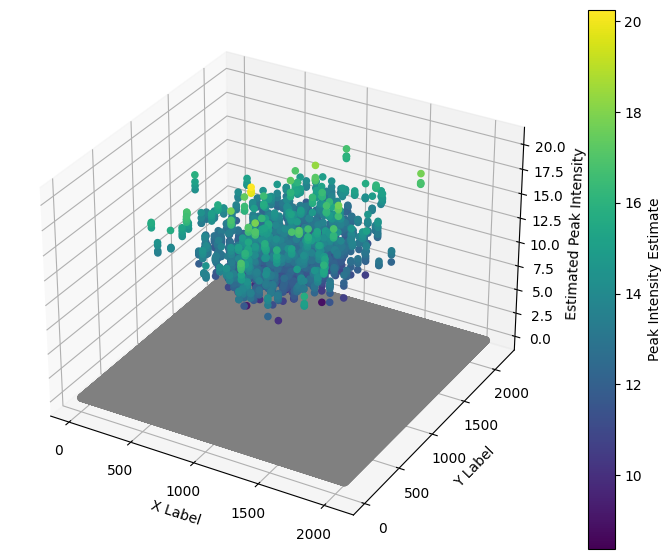

In [7]:
# the entire MAT 494 project right here.
b = background.BackgroundSubtraction(threshold=20)
b.main(overlay_files=myPaths.total_paths.overlays)

# all_data = b.main(overlay_files=myPaths.total_paths.overlays)
# print(all_data)
# all_data.to_csv('all_data.csv')

In [3]:
f.check_attributes(paths=myPaths, datasets=f.convert2str(datasets), dir_type='peak')
print(myProcessor.get_parameters())

f.retrieve_attributes(file_path=myPaths.total_paths.water_background[0])
f.check_attributes(paths=myPaths, datasets=f.convert2str(datasets), dir_type='label')

/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00014.h5 conforms to expected attributes.
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00014.h5:
Expected Peak: False, Actual Peak: False
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00004.h5 conforms to expected attributes.
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00004.h5:
Expected Peak: False, Actual Peak: False
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00010.h5 conforms to expected attributes.
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00010.h5:
Expected Peak: False, Actual Peak: False
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/img_6keV_clen01_00078.h5 conforms to expected attributes.
/Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/img_6keV_cl

True

In [8]:
f.get_counts(paths=myPaths, datasets=datasets)
# %run process_directory.py ../../images  --percent_empty 0.5 
# f.get_counts(paths=myPaths, datasets=datasets)

Paths refreshed for dataset ['01', '02', '03'].
Directory: peaks/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: labels/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: peaks_water_overlay/01
	Total files: 58
	Normal images: 39
	Empty images: 19
Directory: peaks/02
	Total files: 25
	Normal images: 17
	Empty images: 8
Directory: labels/02
	Total files: 25
	Normal images: 17
	Empty images: 8
Directory: peaks_water_overlay/02
	Total files: 25
	Normal images: 17
	Empty images: 8
Directory: peaks/03
	Total files: 22
	Normal images: 15
	Empty images: 7
Directory: labels/03
	Total files: 22
	Normal images: 15
	Empty images: 7
Directory: peaks_water_overlay/03
	Total files: 22
	Normal images: 15
	Empty images: 7


In [10]:
model1 = m.BasicCNN1()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cfg = {
    'num_epochs': 2,
    'num_classes': 2,
    'batch_size': 10,
    'threshold':0.5,
    'loader': [train_loader,test_loader],
    'train_size': len(train_loader.dataset),
    'test_size': len(test_loader.dataset),
    'criterion': criterion,
    'optimizer': optimizer,
    'device': device,
    'model': model1,
    }

# self, model: nn.Module, loader: list, criterion, optimizer, device, cfg: dict, feature: str, labels: list
t = train_eval.TrainTestModels(model=model1, loader=[train_loader,test_loader], criterion=criterion, optimizer=optimizer, device=device, cfg=cfg, feature='peak', labels=['water','background'])
t.epoch_loop()

Model testing and validating: BasicCNN1
Looking for the feature: peak
-- epoch 0


ValueError: Target size (torch.Size([10, 1])) must be the same as input size (torch.Size([10, 1, 2163, 2069]))

In [ ]:
test_peaks = myPaths.get_peak_image_paths(dataset=dataset)[0]
test_water = myPaths.get_peaks_water_overlay_image_paths(dataset=dataset)[0]
test_overlay = myPaths.get_peaks_water_overlay_image_paths(dataset=dataset)[0]
param1, param2 = (0.5, 9000), (0.5, 9000, True)
f.assign_attributes(file_path=test_peaks, params=param1)

Attributes ['params'] assigned to /Users/adamkurth/Documents/vscode/CXFEL/cxls_hitfinder/images/peaks/01/empty_peak_01_00020.h5
